# Marcha Aleatoria

Camila Cardenas Uribe - 202011696

Código de aplicación tarea 1

In [2]:
'''Importacion y declaracion de las librerias'''
import matplotlib.pyplot as plt 
'''Llamado a pyplot componente de la libreria 
matplotlib implementado para realizar graficos'''
import numpy as np
'''Libreria numpy implementa para el manejo de operaciones 
y simbolos algebraicos'''
import random as rd
'''libreria que genera variables aleatorias'''
from tabulate import tabulate

La marcha aleatoria es una formalización matemática del camino, causada por sucesivos pasos aleatorios. En este sentido, dentro de la aplicación implementada en el siguiente código es definir un conjunto de estos pasos o sucesos aleatorios para establecer una correlación con los puntos desarrollados numericamente dentro de la tarea. Se analizara entonces la implemntacion de la distribuion binomial y el teorema del limite central partiendo de N pequeños, punto de referencia (x,t)=(0,0) y distribucion equivalente para la direccion en la cual se produce un paso (derecha o izquierda).

In [3]:
x=0
'''Posición inicial, punto de referencia'''
t, N= 200, 200
n=list(range(5,105,10))
'''t representativo y N numero de pasos'''
a=1
'''Longitud reportada para el paso'''
rang=1000 
'''rango de repeticiones de la posición'''
right=1
left=0
average=[]
average_2=[] 
'''Se sugiere mantener la relacion entera right>left'''
'''
    Por simplicidad esta seccion solo define las variables 
    si lo desea puede modificarlas
'''

'\n    Por simplicidad esta seccion solo define las variables \n    si lo desea puede modificarlas\n'

In [4]:
def random_step (N,t,x,a,right,left,rang):
    '''
        Esta funcion se implemnta para generar los pasos aleatorios
        conservandolos en una lista (final_position) con dimension igual al rango de 
        iteraciones ingresado por el usuario. Cada posicion nueva se 
        ira agregando a la lista despues de pasar por n doble recorrido. La lista (step)
        actualiza los valores aleatorio que arroja la funcion random en el intervalo
        de izquierda-derecha implementado taambien por el usuario
    '''
    final_position=[]
    for i in range (0,rang):
        step=[]
        for j in range (0,t):
            one_step=rd.randint(left,right)
            step.append(one_step)
        number_step=step.count(1)
        x = a*(2*number_step-N)
        '''
            Ecuacion que relaciona la posicion x despues de N pasos encontrada een el inciso 2.2
        '''
        final_position.append(x)
        intervals= range(min(final_position), max(final_position)+2)
    return final_position, intervals
    

# Solucion ejercicio 7

Escribir un programa de computador que simule una marcha aleatoria (en una, dos o tres
dimensiones, como prefiera) de N pasos en donde N sea un parámetro que se entra en el
computador. El programa debe dar la posición r después de los N pasos. Para N fijo pero
grande correr el programa un número importante de veces para poder construir un histograma (posición final en función del número de veces que se repite) y comparar con la ley de
probabilidad predicha por el teorema central límite.

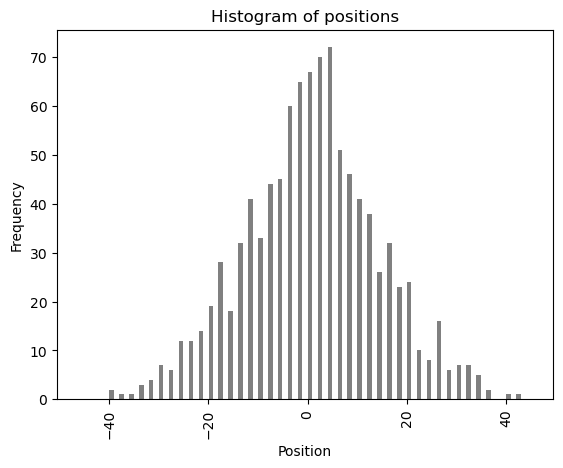

In [5]:
'''
    La funcion histogram-graphic implementa la libreria matplolib con la finalidad de generar un histograma
    dada la lista de posiciones y el intervalo de la funcion anterior. Ademas, la funcion da forma al histograma 
    respetando el codigo de color RGB usado por Latex para un articulo. En los ejes se presenta  las cantidades adimencionales 
    consideradas para el ejemplo. 
'''

def Histogram_graphic(final_position, intervals):
    plt.hist(x=final_position, bins=intervals, color='#808080', rwidth=0.9)
    plt.title('Histogram of positions')
    plt.xlabel('Position')
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')
    '''
        Diseño del histograma y llamado de la funcion random_step
    '''
    plt.show()
final_position, intervals = random_step(N,t,x,a,right,left, rang)[0], random_step(N,t,x,a,right,left, rang)[1]
Histogram_graphic(final_position,intervals)

# Solucion ejercicio 8

In [6]:
'''
    La funcion average_distribution recibe dos listas que pueden ser modificadas por el usuario en la seccion de variables, 
    generalmente en vacias. De esta forma, se encarga de modificar las listas asignando a cada una el valor 
    de n (numero de pasos), ⟨r⟩ media esperada y ⟨r^2⟩ retornando una lista de listas. 
'''
def average_distribution(average1,average2):
    for r in n: 
        final_position=random_step(r,r,x,a,right,left, rang)[0]
        mean=np.mean(final_position)
        average1.append(mean)
        '''
        Recorriedo en el rango de pasos n, parametro introducido por el usuario en la seeccion de variables. Por otra parte,
        el componente mean perteneciente a la libreria numpy calcula la media lista final-osition importada del punto anterior
        de la funccion random-step
        '''
        for k in final_position: 
            var=np.var(k)
            average2.append(var)
    return n, average1, average2


In [7]:
'''
    Se dara formato de tabla al retorno de la funcion average_distribution con la finalidad de incluir estos valores 
    dentro de un informe de resultados en Latex. Se toma cada elemento en la posicion i de cada lista para generar una lista 
    de listas igual a:
    [[n_1,"⟨r_1⟩", "⟨(r_1)^2⟩"], [n_2,"⟨r_2⟩", "⟨(r_2)^2⟩"], ... , [n_k,"⟨r_k⟩", "⟨(r_k)^2⟩"]] con k= rango de pasos implementados. 
    con esta lista se usa la funcion, tabulate, y se presentan los datos
'''
list_tabule=[]
list_n=average_distribution(average,average_2)[0]
list_a1=average_distribution(average,average_2)[1]
list_a2=average_distribution(average,average_2)[2]
ele=len(list_n)
for i in range (ele):
    list_tabule.append([list_n[i],list_a1[i],list_a2[i]])
print(tabulate(list_tabule, headers=["n", "⟨r⟩", "⟨r^2⟩"]))

  n     ⟨r⟩    ⟨r^2⟩
---  ------  -------
  5   0.042        0
 15  -0.028        0
 25   0.04         0
 35   0.214        0
 45   0.082        0
 55  -0.156        0
 65  -0.196        0
 75   0.176        0
 85  -0.288        0
 95  -0.408        0


In [12]:
'''
   Constante de difusion
   Del punto 6 para n = 5
'''
D= round (((a**2)/2*np.pi)-1,3)
print (D)

0.571
